# Demo

Ezen notebook kiegészítséként szolgál a dolgozat 6. fejezetéhez.

A dolgozat során létrejött eredmények futtatására szolgáló kódokat a _obinv_ nevű python csomagban foglaltam össze.


A csomag osztályai:

- **InputHandler**

A bemeneti szöveg feldolgozásáért felelős osztály. A célja a bemeneti szövegtisztítása és a tokenek megalkotása.

    - Az osztály metódusai:
        - remove_punctuations
        - make_lowercase
        - tokenize_text
        - serialize_percentage_tokens
        - normalize_text

A normalize_text metódus az összes többi metódust meghívja a megfelelő sorrendben és visszaadja a végeredményt.

- **TokenHandler**

A tokenekek összehasonlító műveleteit megvalósító osztály. A tartalmazás mértékét [0, 1] között adja meg.

    - Az osztály metódusai:
        - compare_two_tokens
        - find_best_match_for_token

- **SynonymsLoader**

A json formátumban tárolt szinonímák betöltéséért felelős osztály.

    - Az osztály metódusai:
        - load_synonyms
    
Static metódust definiál

- **StructuredDataMaker**

A tokenekből való strukturált adatok megalkotásáért felelős osztály. Az osztályokat a szinoníma szótár szerint azonosítja.

Függősségei a beolvasott szinoníma szótár és a TokenHandler.

    - Az osztály metódusai:
        - find_classes
        - find_percentage_values
        - make_dict_from_classes
        - make_structured_data
    
A make_structured_data metódus a megfelelő sorrendben meghívja az osztály további metódusait, ezzel létrehozva a strukturált adatot a tokenekből.

- **Encoder**

A strukturált adatból one-hot reprezentációt előállító osztály.

    - Az osztály metódusai:
        - make_one_hot

- **ImageSynthetizer**

A képet előáálító osztály, függősége a generátor és a hozzá tartozó osztályozó. A képek előáálítását egy random pontból kezdi meg, majd az osztályozó segítségével gradiens módszerrel 

    - Az osztály metódusai:
        - gradient_descent_momentum

- **ModelLoader**

A betanított modellek betöltéséért felelős osztály.

    - Az osztály metódusai:
        - load_model
        
- **ResultPlotter**

Az eredmények kirejzolásáért felelős osztály

    - Az osztály metódusai:
        - show_result
        - plot_convergence

- **TextToImage**

A csomag azon osztálya, amely az eddig felsorolt összes funkcionalitáshoz hozzáférést biztosít.

    - Az osztály metódusai:
        - generate_image_from_text

A csomag használatára ezen notebook kíván például szolgálni.

In [1]:
from obinv.TextToImage import TextToImage

2022-05-05 11:05:03.077932: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-05 11:05:03.078001: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#generator_path = './datas/weights/msggan/newMSGmodel/msgGeneratornew.h5'
generator_path = './datas/weights/msggan/afhq/msgGenerator.h5' # Generator with a collapsed mode...
classifier_path = './datas/weights/classifier/animalFacesClassifier.h5'
synonyms_path = './datas/synonyms/afhq_synonyms.json'

animal_text_to_image = TextToImage(generator_path,
                                   classifier_path, synonyms_path)

2022-05-05 11:05:06.439826: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-05 11:05:06.439861: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-05 11:05:06.439893: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Inspiron-5558): /proc/driver/nvidia/version does not exist
2022-05-05 11:05:06.440157: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


tf.Tensor([[2.3726377e-04 9.9919182e-01 5.7085167e-04]], shape=(1, 3), dtype=float32)
Step: 0, Loss: 4.1735734939575195


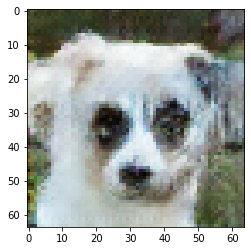

tf.Tensor([[1.5659658e-03 9.9825186e-01 1.8219530e-04]], shape=(1, 3), dtype=float32)
Step: 1, Loss: 3.2305009365081787


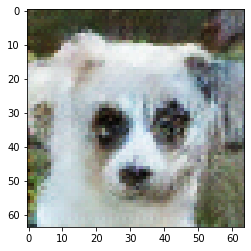

tf.Tensor([[0.3133168  0.6327247  0.05395852]], shape=(1, 3), dtype=float32)
Step: 2, Loss: 0.8091301918029785


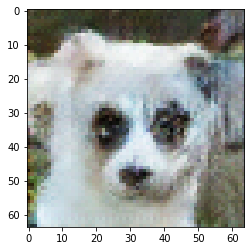

tf.Tensor([[0.0031727  0.9918732  0.00495408]], shape=(1, 3), dtype=float32)
Step: 3, Loss: 2.880666971206665


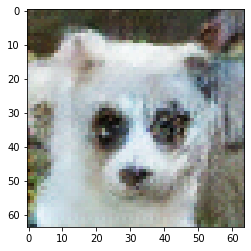

tf.Tensor([[0.00943594 0.98432124 0.00624287]], shape=(1, 3), dtype=float32)
Step: 4, Loss: 2.3395164012908936


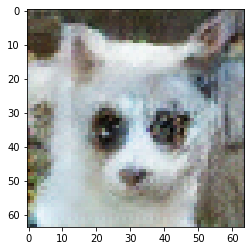

tf.Tensor([[0.09532687 0.8202958  0.0843774 ]], shape=(1, 3), dtype=float32)
Step: 5, Loss: 1.2742669582366943


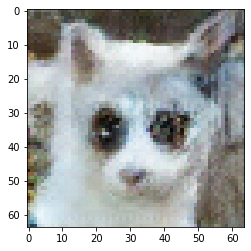

tf.Tensor([[0.35743862 0.48485264 0.1577087 ]], shape=(1, 3), dtype=float32)
Step: 6, Loss: 0.8763508796691895


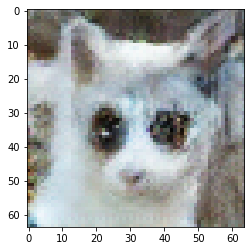

tf.Tensor([[0.06879667 0.8320291  0.09917422]], shape=(1, 3), dtype=float32)
Step: 7, Loss: 1.430243968963623


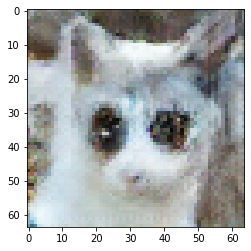

tf.Tensor([[0.8263799  0.14832412 0.02529592]], shape=(1, 3), dtype=float32)
Step: 8, Loss: 1.0495280027389526


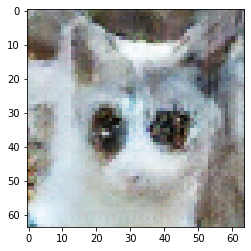

tf.Tensor([[0.06333227 0.68426996 0.25239766]], shape=(1, 3), dtype=float32)
Step: 9, Loss: 1.5693813562393188


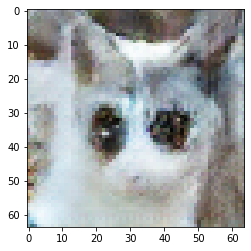

tf.Tensor([[0.35349724 0.5884684  0.05803437]], shape=(1, 3), dtype=float32)
Step: 10, Loss: 0.7850557565689087


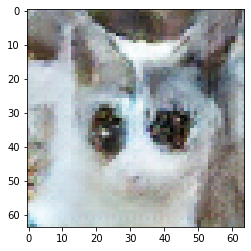

tf.Tensor([[0.01705615 0.883191   0.09975293]], shape=(1, 3), dtype=float32)
Step: 11, Loss: 2.097729206085205


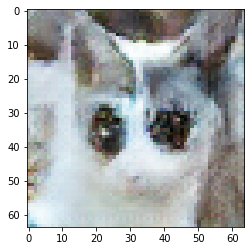

tf.Tensor([[0.32208458 0.3629613  0.31495416]], shape=(1, 3), dtype=float32)
Step: 12, Loss: 1.0732001066207886


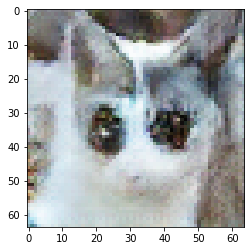

tf.Tensor([[0.30727303 0.603882   0.0888449 ]], shape=(1, 3), dtype=float32)
Step: 13, Loss: 0.8421974182128906


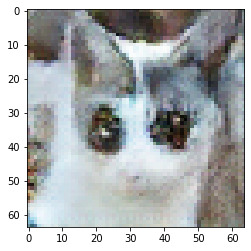

tf.Tensor([[9.9895453e-01 9.7699952e-04 6.8416142e-05]], shape=(1, 3), dtype=float32)
Step: 14, Loss: 3.4660351276397705


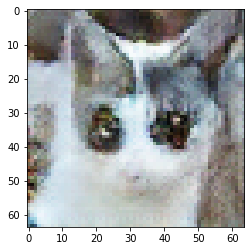

tf.Tensor([[0.10816471 0.88200384 0.0098314 ]], shape=(1, 3), dtype=float32)
Step: 15, Loss: 1.1748294830322266


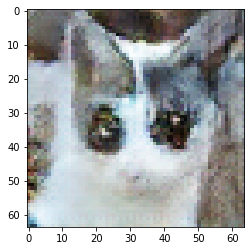

tf.Tensor([[0.97313434 0.02440836 0.00245726]], shape=(1, 3), dtype=float32)
Step: 16, Loss: 1.8700312376022339


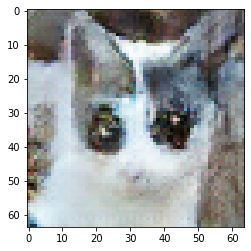

tf.Tensor([[0.28190488 0.6967565  0.02133865]], shape=(1, 3), dtype=float32)
Step: 17, Loss: 0.8137524724006653


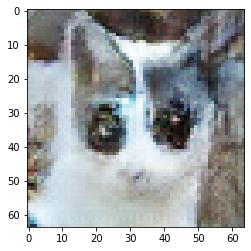

tf.Tensor([[0.00695556 0.9897938  0.0032507 ]], shape=(1, 3), dtype=float32)
Step: 18, Loss: 2.489236354827881


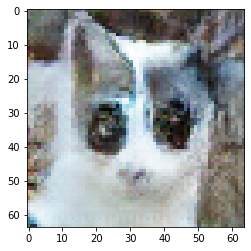

tf.Tensor([[0.0497978  0.94556826 0.00463393]], shape=(1, 3), dtype=float32)
Step: 19, Loss: 1.527876853942871


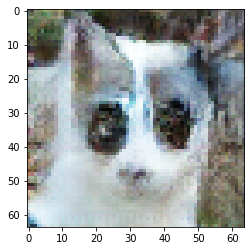

tf.Tensor([[0.07839839 0.9162872  0.00531444]], shape=(1, 3), dtype=float32)
Step: 20, Loss: 1.3166886568069458


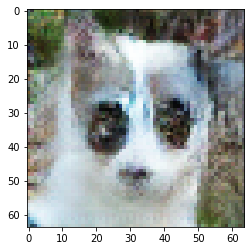

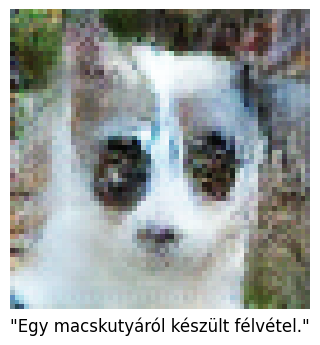

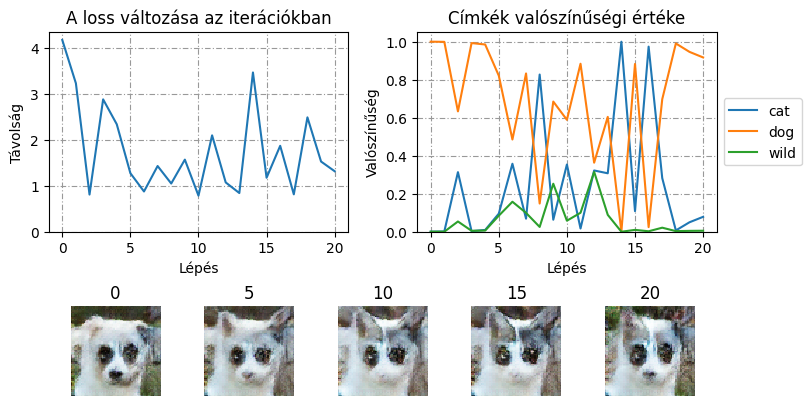

{'cat': 0.5, 'dog': 0.5, 'wild': 0.0}


In [3]:
input_sentence = "Egy macskutyáról készült félvétel."

step_size = 0.02
momentum = 0.9
steps = 21

result_noises, losses, preds, structured_data =\
    animal_text_to_image.generate_image_from_text(
        input_sentence,
        step_size=step_size, momentum=momentum, steps=steps,
        seed=2,
        verbose=True, show_convergence=True
)

print(structured_data)

In [5]:
generator_path = './datas/weights/msggan/cifar10/msgGeneratorCifar10.h5' # Generator with a collapsed mode...
classifier_path = './datas/weights/classifier/cifar10Classifier.h5'
synonyms_path = './datas/synonyms/cifar10_synonyms.json'

cifar_text_to_image = TextToImage(generator_path, classifier_path, synonyms_path)

tf.Tensor(
[[3.2365513e-03 1.7616799e-04 6.2049892e-02 4.8697913e-01 3.3229776e-03
  3.8056341e-01 2.6259074e-02 3.2328863e-02 3.5969554e-03 1.4869611e-03]], shape=(1, 10), dtype=float32)
Step: 0, Loss: 5.627667427062988


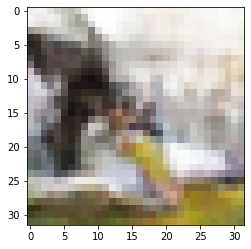

tf.Tensor(
[[7.6968104e-02 4.8789688e-04 2.0920886e-01 5.1944602e-01 5.3672444e-02
  3.4517132e-02 1.7721657e-02 7.2565198e-02 1.3367934e-02 2.0447508e-03]], shape=(1, 10), dtype=float32)
Step: 1, Loss: 4.314896583557129


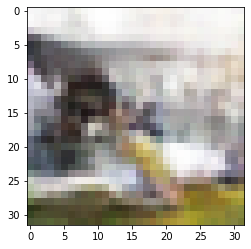

tf.Tensor(
[[1.9463792e-01 6.7127374e-05 1.3315853e-03 6.2655553e-04 9.7326841e-03
  9.8276607e-05 1.8133987e-04 1.0039128e-03 7.9173118e-01 5.8941561e-04]], shape=(1, 10), dtype=float32)
Step: 2, Loss: 0.2335333675146103


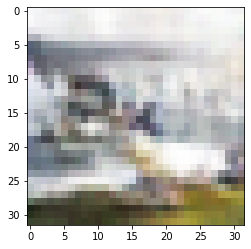

tf.Tensor(
[[1.34906601e-02 1.35402501e-04 8.20660789e-04 3.35531047e-04
  5.19730709e-03 1.79349925e-04 1.14135779e-04 2.49608973e-04
  9.79362249e-01 1.15089984e-04]], shape=(1, 10), dtype=float32)
Step: 3, Loss: 0.020853685215115547


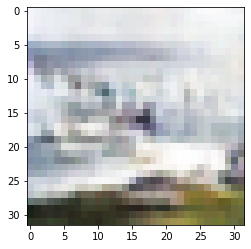

tf.Tensor(
[[9.6100178e-03 9.1907888e-05 5.1571336e-04 1.6525538e-04 1.0937271e-03
  1.0473862e-04 1.0310860e-04 1.1855261e-04 9.8812324e-01 7.3756732e-05]], shape=(1, 10), dtype=float32)
Step: 4, Loss: 0.011947854422032833


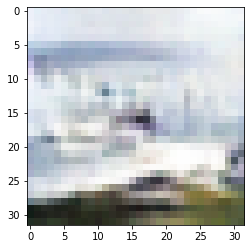

tf.Tensor(
[[1.29176155e-02 4.55661320e-05 2.85436545e-04 4.82958931e-05
  3.86233587e-04 3.95579336e-05 1.25697596e-04 8.41427391e-05
  9.86009836e-01 5.75643571e-05]], shape=(1, 10), dtype=float32)
Step: 5, Loss: 0.0140888886526227


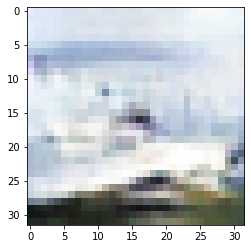

tf.Tensor(
[[3.9444011e-02 6.2886837e-05 6.2805956e-04 7.3484232e-05 7.7435351e-04
  4.2193980e-05 2.7315650e-04 7.9197431e-05 9.5853680e-01 8.5847809e-05]], shape=(1, 10), dtype=float32)
Step: 6, Loss: 0.042347319424152374


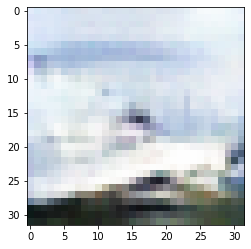

tf.Tensor(
[[5.9494108e-02 8.4884967e-05 5.9876277e-04 9.8738259e-05 1.3189412e-03
  3.7497015e-05 1.9586623e-04 1.1100435e-04 9.3797952e-01 8.0644015e-05]], shape=(1, 10), dtype=float32)
Step: 7, Loss: 0.06402716785669327


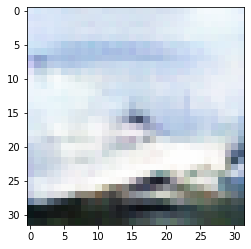

tf.Tensor(
[[6.85142428e-02 8.40571302e-05 7.01547775e-04 1.05828367e-04
  1.10240781e-03 2.87468247e-05 1.13881892e-04 1.14778915e-04
  9.29141998e-01 9.24316337e-05]], shape=(1, 10), dtype=float32)
Step: 8, Loss: 0.07349363714456558


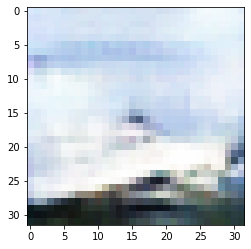

tf.Tensor(
[[4.8648160e-02 9.2923139e-05 6.7968114e-04 9.8612130e-05 9.0417132e-04
  2.4801668e-05 6.9895672e-05 9.3380651e-05 9.4931006e-01 7.8299592e-05]], shape=(1, 10), dtype=float32)
Step: 9, Loss: 0.05201980844140053


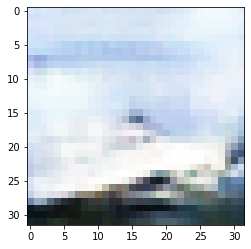

tf.Tensor(
[[3.0449953e-02 8.2942861e-05 5.4474943e-04 8.4751955e-05 4.7337028e-04
  2.1015847e-05 4.8346839e-05 7.1784685e-05 9.6814984e-01 7.3175877e-05]], shape=(1, 10), dtype=float32)
Step: 10, Loss: 0.03236834704875946


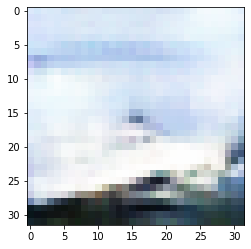

tf.Tensor(
[[2.8032292e-02 1.0186863e-04 4.9530307e-04 8.6626867e-05 3.5365793e-04
  2.3938012e-05 4.4140786e-05 6.4751948e-05 9.7070247e-01 9.4921037e-05]], shape=(1, 10), dtype=float32)
Step: 11, Loss: 0.029735274612903595


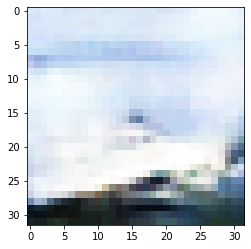

tf.Tensor(
[[2.93775462e-02 1.29107109e-04 5.24581992e-04 9.08565635e-05
  3.26338806e-04 2.78378302e-05 4.57852548e-05 7.40200121e-05
  9.69285071e-01 1.18760865e-04]], shape=(1, 10), dtype=float32)
Step: 12, Loss: 0.03119639679789543


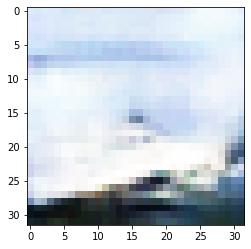

tf.Tensor(
[[2.5957432e-02 1.2791803e-04 4.5670714e-04 8.3895175e-05 2.7284626e-04
  2.5727226e-05 4.4792250e-05 7.5305994e-05 9.7283369e-01 1.2167114e-04]], shape=(1, 10), dtype=float32)
Step: 13, Loss: 0.027542071416974068


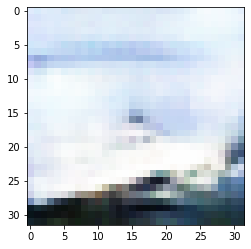

tf.Tensor(
[[2.1107685e-02 1.1162269e-04 3.4523528e-04 7.6034674e-05 1.9889620e-04
  2.1897085e-05 3.9926588e-05 6.7474539e-05 9.7792882e-01 1.0234560e-04]], shape=(1, 10), dtype=float32)
Step: 14, Loss: 0.022318335250020027


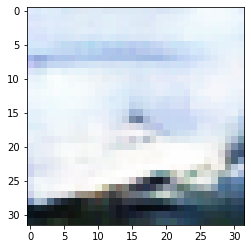

tf.Tensor(
[[1.7341804e-02 9.7720455e-05 2.5612322e-04 7.2813920e-05 1.3836815e-04
  1.9333756e-05 3.5714722e-05 5.8599264e-05 9.8189235e-01 8.7214365e-05]], shape=(1, 10), dtype=float32)
Step: 15, Loss: 0.018273603171110153


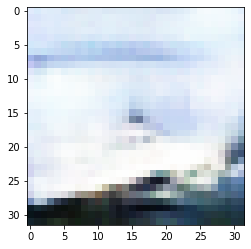

tf.Tensor(
[[1.4033840e-02 8.0465339e-05 2.0163787e-04 6.8264526e-05 1.0306584e-04
  1.6544012e-05 3.2815333e-05 5.1026742e-05 9.8533881e-01 7.3511444e-05]], shape=(1, 10), dtype=float32)
Step: 16, Loss: 0.01476967055350542


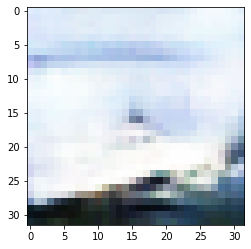

tf.Tensor(
[[1.1381928e-02 6.5427703e-05 1.5681286e-04 6.2111460e-05 7.6431701e-05
  1.4501070e-05 2.8278329e-05 4.4868120e-05 9.8810518e-01 6.4417211e-05]], shape=(1, 10), dtype=float32)
Step: 17, Loss: 0.011966071091592312


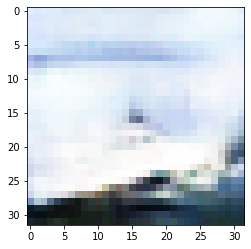

tf.Tensor(
[[1.0076078e-02 6.2446292e-05 1.3666804e-04 6.2612489e-05 6.8643647e-05
  1.4665003e-05 2.7157206e-05 4.5177159e-05 9.8944002e-01 6.6551118e-05]], shape=(1, 10), dtype=float32)
Step: 18, Loss: 0.010616128332912922


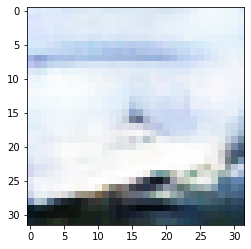

tf.Tensor(
[[9.3698502e-03 6.2394334e-05 1.2504797e-04 6.4927699e-05 6.5239459e-05
  1.5358215e-05 2.7182474e-05 4.7232297e-05 9.9015290e-01 6.9933078e-05]], shape=(1, 10), dtype=float32)
Step: 19, Loss: 0.00989590771496296


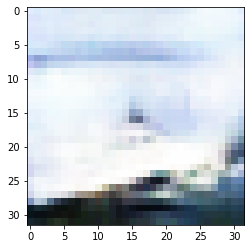

tf.Tensor(
[[8.57813004e-03 5.98418919e-05 1.12644964e-04 6.33223826e-05
  6.08439441e-05 1.50514024e-05 2.63986585e-05 4.73147775e-05
  9.90966678e-01 6.98448639e-05]], shape=(1, 10), dtype=float32)
Step: 20, Loss: 0.009074490517377853


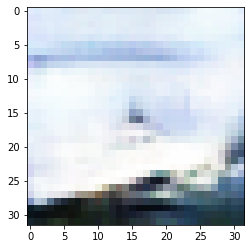

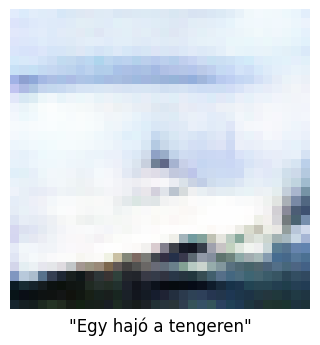

{'airplane': 0.0, 'automobile': 0.0, 'bird': 0.0, 'cat': 0.0, 'deer': 0.0, 'dog': 0.0, 'frog': 0.0, 'horse': 0.0, 'ship': 1.0, 'truck': 0.0}


In [12]:
input_sentence = "Egy hajó a tengeren"

step_size = 0.03
momentum = 0.8
steps = 21

result_noises, losses, preds, structured_data = cifar_text_to_image.generate_image_from_text(
    input_sentence,
    seed=2017,
    step_size=step_size, momentum=momentum, steps=steps, verbose=True
)

print(structured_data)